# imports

In [1]:
# export
import numpy as np

In [2]:
# export
# 为什么用这个包？opencv也可以读tif文件，但是它只适合读较小的文件，对于特别大的tif，例如几个G，则需要tiff来读
import tifffile as tiff

In [3]:
# export
import cv2

In [4]:
from matplotlib import pyplot as plt

# functions

In [5]:
# export
def to_8bit(x):
    '''
    把x内的像素值转换到[0,255]范围。
    --------------------
    input:
    x: 一个array，维度为[h,w,3]，其中最后一个维度的三个通道为 R,G,B
    --------------------
    return: 一个array，维度与x一致，但是像素值被转换到了[0,255]范围
    --------------------
    '''
    chmax = x.max(axis=(0,1))
    chmin = x.min(axis=(0,1))
    x = (x-chmin)/(chmax-chmin)*255
    x = x.astype(np.uint)
    return x

In [6]:
# export
def tif2rgb(x,rgb=[2,1,0]):
    '''
    把x转换为rgb图像。
    -----------------------
    input:
    x: 一个array，维度为[c,h,w]，其中第一个维度的通道数c>=3
    rgb: 把x的哪3个通道作为rgb通道来可视化，[2,1,0] or [3,2,1]
    -----------------------
    return: 一个array，维度为[h,w,3]，通道为R,G,B，且像素值在[0,255]范围
    '''
    x = x.transpose((1,2,0))
    x = x[...,rgb]
    x = to_8bit(x)
    x = x.astype(np.uint)
    return x

In [7]:
# export
def tif2mask(x,mask_value=255):
    '''
    把x转换为单通道mask.
    --------------------------
    input:
    x: 一个array，维度为[c,h,w]或[h,w]，其中值>0的像素为mask
    mask_value：在输出中，mask像素的值设置为mask_value
    --------------------------
    return: 一个array，维度为[h,w]，mask像素值为mask_value，其它像素值为0
    '''
    if len(x.shape)>2:
        x = x.transpose((1,2,0))
        x = x[...,0]
    x[x>0] = mask_value
    x = x.astype(np.uint)
    return x

In [8]:
# export
def save_tif_as_fig(tif_fn, fig_fn, rgb=[2,1,0], is_mask=False, mask_value=255):
    '''
    把tif文件转换并保存为图像文件。
    ------------------------------------
    input:
    tif_fn: tif文件的路径
    fig_fn：要保存的图像文件的路径
    rgb: 把tif中的哪3个通道作为rgb通道来可视化，[2,1,0] or [3,2,1]
    is_mask：是否mask
    mask_value：若is_mask=True，则mask像素值设置为mask_value
    '''
    tif = tiff.imread(tif_fn)
    if is_mask:
        fig = tif2mask(tif, mask_value)
    else:
        fig = tif2rgb(tif, rgb=[2,1,0])
    cv2.imwrite(fig_fn, fig)

# test

## tif 转 rgb

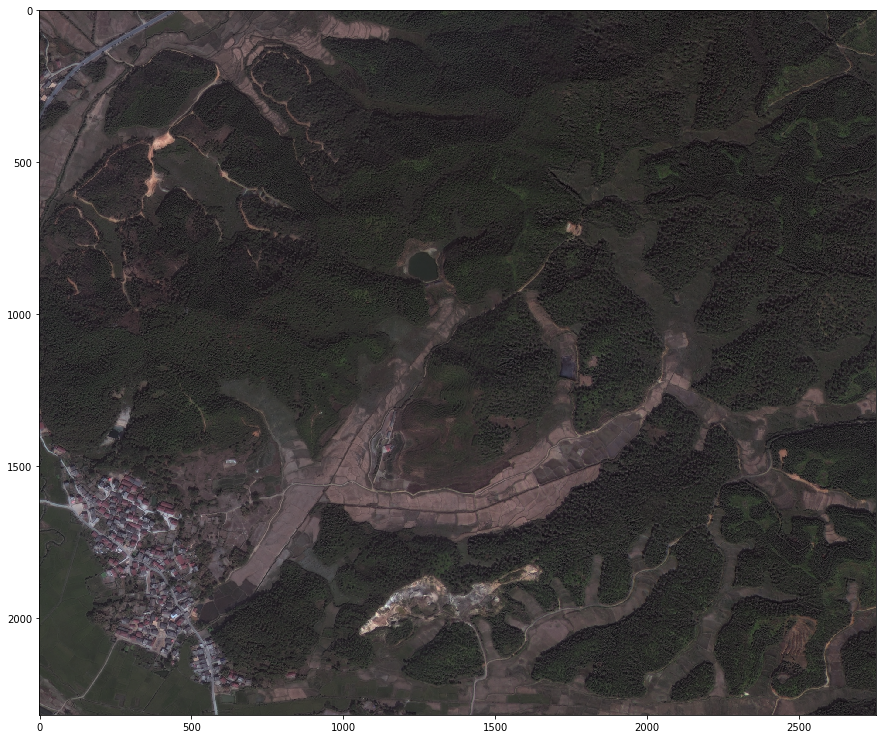

In [9]:
tif = tiff.imread('./data/src/2.tif')
rgb210 = tif2rgb(tif,rgb=[2,1,0])

_,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(rgb210);

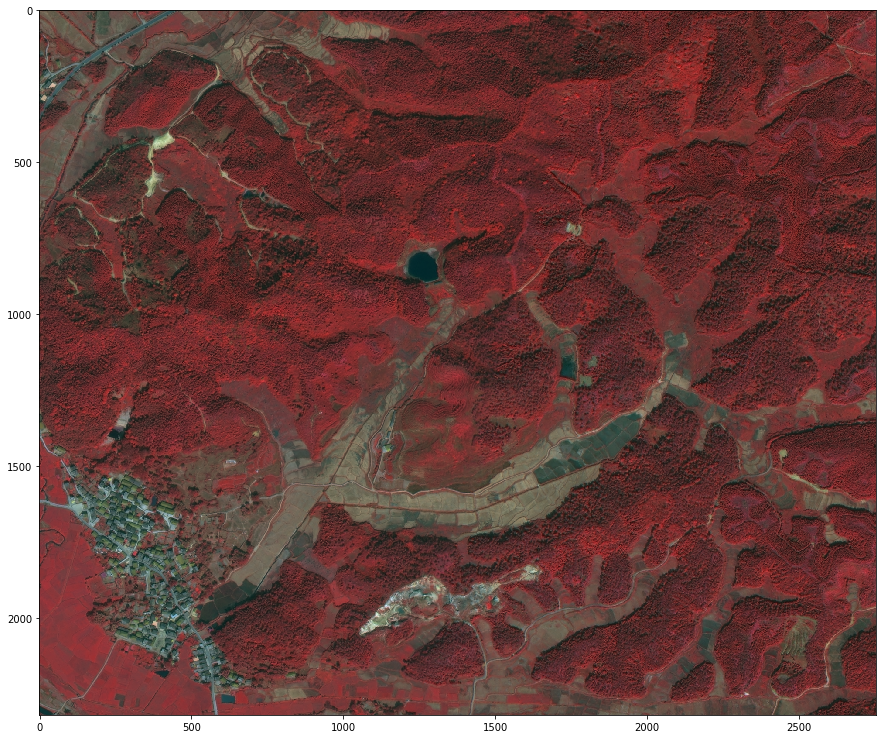

In [10]:
tif = tiff.imread('./data/src/2.tif')
rgb321 = tif2rgb(tif,rgb=[3,2,1])

_,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(rgb321);

## tif 转 mask

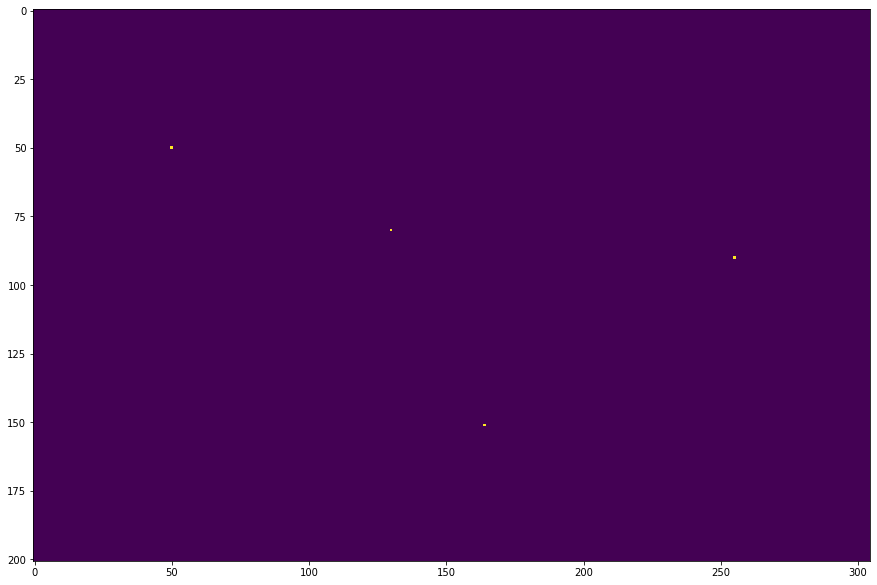

In [11]:
tif = tiff.imread('./data/src/2p.tif')
mask = tif2mask(tif)
mask = mask[960:1161, 527:832]
_,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(mask);

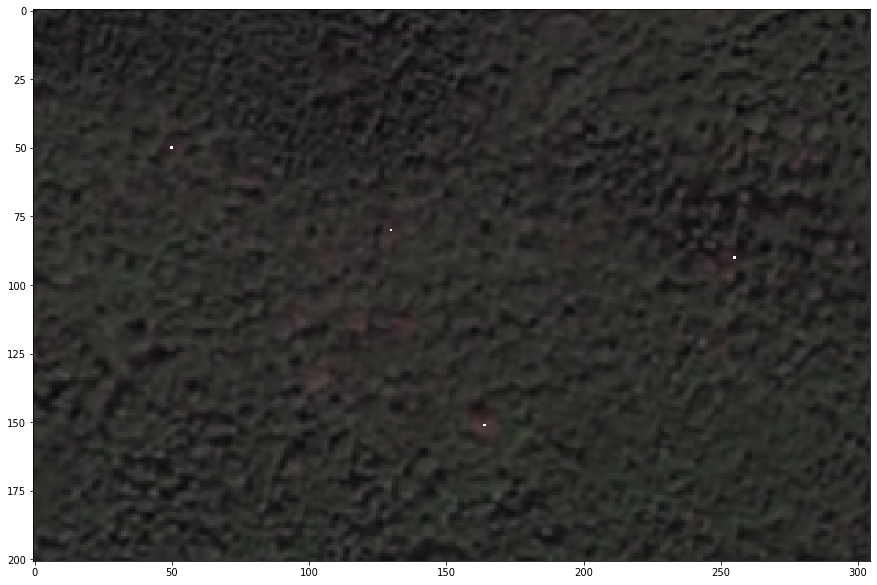

In [12]:
rgb210 = rgb210[960:1161, 527:832]
fig_mask = rgb210 + mask[...,None]
fig_mask = fig_mask.clip(max=255)

_,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(fig_mask);

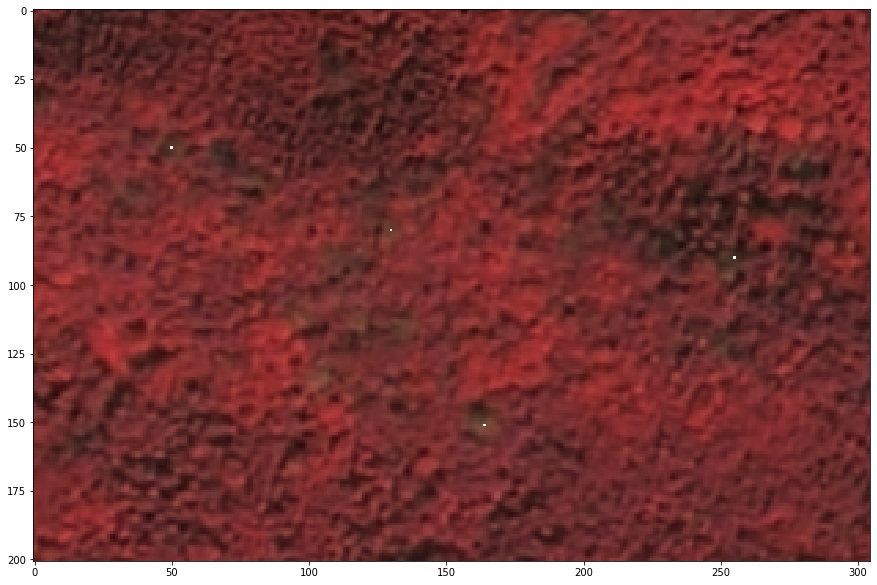

In [13]:
rgb321 = rgb321[960:1161, 527:832]
fig_mask = rgb321 + mask[...,None]
fig_mask = fig_mask.clip(max=255)

_,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(fig_mask);

## tif 存为图片

In [14]:
# # 遥感影像
# tif_fn = './data/src/1.tif'
# fig_fn = './data/src/1.jpg'
# save_tif_as_fig(tif_fn, fig_fn)

In [15]:
# # 标注
# tif_fn = './data/src/label_1.tif'
# fig_fn = './data/src/label_1.png'
# save_tif_as_fig(tif_fn, fig_fn, is_mask=True)

## 读取超大图片文件的方法

In [16]:
from PIL import Image

In [17]:
# 修改PIL对图片像素的限制
Image.MAX_IMAGE_PIXELS = None

In [18]:
img = Image.open('./data/src/1.jpg')

In [19]:
img = np.asarray(img)

In [20]:
img.shape

(33516, 38671, 3)

# export

In [21]:
!python notebook2script.py --fname 'tif2fig.ipynb' --outputDir './exp/'

Converted tif2fig.ipynb to exp/nb_tif2fig.py
